<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


Основная цель: исследовать наличеие зависимостей междлу ценой и другими параметрами!

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    print ("файл не открылся")
    
display(data.head())

data.isna().sum()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

## Предобработка данных

In [2]:

data.isna().sum()*100/len(data)

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Сначала посмотрим на структуру пропусков в данных
что кртично сразу видим
38% высоты потолков пропущено!

13% days_exposition  (сколько дней находилось объявдвение в базе до продажи) - пропущено!

это 2 критичных параметра, остальная структура пропусков или не значительна или поддаетсялогично замене (см рассуждения ниже)

Открыли таблицу, начинаем изучать данные. 
Всего в датасете 23 699 строк. Достаточный объем.
Вывели 20 строк датасета и проверяем каждый столбец на полноту и ясность данных.Будем фиксировать только столбцы, где есть проблемы.

ceiling_height - есть пропущенные значения по высоте потолков. Пропущена высота потолков почти в половине значений, что является критичным к объему выборки. если заменим какими-то средними или медианными данными, то возможно потеряем зависимость между высотой потолка и ценой квадратного метра. Высота потолка может влиять на цену при значимом отклонении от обычных данных. Возможно, резонной заменой пропусков будет мода по ряду (самый частотная высота потолка). Заменим модой.

floors_total - всего 86 пропущенных значений. Высота дома - важный параметр. Менять его на что либо не стоит. Предпочитаю удалить эти данне из датасета

living_area - есть Nan. значение пропущено в 9% данных. Вроде не критично много, но чем заменить? можно посчитать как разницу между 'total_area' и 'kitchen_area'. Эта мера не позволит избавиться от всех пропусков, но снизит их количество.

is_apartment - Nan  вероятно означает, что это не аппартаменты. Проверим уникальные значения столбца и заменим NaN на ноль

kitchen_area - тоже есть пропуски. Менять их не на что. Оставим данные как есть. 

balcony - пропуски логично заменить на нули (не указано, что есть балкон - значит его нет)

locality_name - нет всего 49 данных. Можно удалить эти строки, они не повлияют на исследование

airports_nearest - много незаполненных строчек. Посмотрим дополнительно уникальные значения, и можно заменить на "нет данных"

parks_nearest - Nan можно за менить на "нет парка". Когда данные пустые, хзначит парка рядом нет.

ponds_around3000 - Nan меняем на ноль. Нет данных о водоемах - значит их ноль. 

ponds_nearest - Nan меняем на ноль. Нет данных о водоемах - значит их ноль. 

days_exposition - 20 518 не пустых значений. 14% данных не заполнена информация о том, как долго продавалась квартира. Очень важная метрика. Возможно квартира так и не была продана, можно заполнить данные как разницу между самым "большим днем" из датасета и "дату публикации" 

Приступим к заменам Nan по определенному списку. 

In [3]:
data = data.dropna(subset=['locality_name','floors_total'])
data['is_apartment'].unique()
data['living_area']=data['living_area'].fillna(data['total_area']-data['kitchen_area'])
data['is_apartment']=data['is_apartment'].fillna(0)
data['balcony'].unique()
data['balcony']=data['balcony'].fillna(0)
data['airports_nearest'].unique()
data['parks_nearest']=data['parks_nearest'].fillna(0)
data['parks_around3000']=data['parks_around3000'].fillna(0)
data['ponds_around3000']=data['ponds_around3000'].fillna(0)
data['ponds_nearest']=data['ponds_nearest'].fillna(0)
#print(data['ceiling_height'].mode())
#data['ceiling_height']=data['ceiling_height'].fillna(2.5)


data.isna().sum()



total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9084
floors_total               0
living_area             1427
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2222
balcony                    0
locality_name              0
airports_nearest        5524
cityCenters_nearest     5501
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3171
dtype: int64

С пропусками days_exposition разберемся отдельно.
Это очень важный параметр - сколько дней объявление висело в базе до тех пор, пока не продался объект. Попробуем исследовать эти данные. Построим график

Text(0.5, 1.0, 'Распределение объявлений \n без days_exposition')

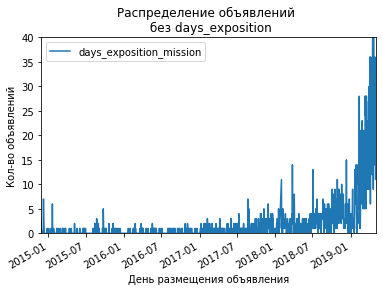

In [4]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'])
#создадтим столбец, который определит пропущена дата или нет

data['days_exposition_mission']=data['days_exposition'].isna().astype(int)


#суммируем и строим график
data.groupby('first_day_exposition').agg({'days_exposition_mission':'sum'}).plot()
plt.ylim(0,40)
plt.xlabel('День размещения объявления')
plt.ylabel('Кол-во объявлений')
plt.title('Распределение объявлений \n без days_exposition')



Из графика следует, что чем ближе конец даты датасета, тем больше объявлений без days_exposition. Я бы сделала вывод, что эти объекты еще находятся в базе и не проданы.
У нас насколько я помню, нет параметра продан или нет оъект
но можно заполнить пропущенные значения как разницу между максимальной датой и датой публикации объявления.
Таким образом, мы получим, сколько времени висит объект в базе


In [5]:
print('Пропуски до {}'.format(data['days_exposition'].isna().sum()))
max_date=data['first_day_exposition'].max()

#data.loc[data['days_exposition'].isna(),'days_exposition']=(max_date-data.loc[data['days_exposition'].isna(),'first_day_exposition']).dt.days
print('Пропуски после {}'.format(data['days_exposition'].isna().sum()))
#data.loc[data['days_exposition'].isna(), 'days_exposition'] = data['first_day_exposition'].max() - data.loc[data['days_exposition'].isna(), 'first_day_exposition']


Пропуски до 3171
Пропуски после 3171


In [6]:
data.isna().sum()

total_images                  0
last_price                    0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height             9084
floors_total                  0
living_area                1427
floor                         0
is_apartment                  0
studio                        0
open_plan                     0
kitchen_area               2222
balcony                       0
locality_name                 0
airports_nearest           5524
cityCenters_nearest        5501
parks_around3000              0
parks_nearest                 0
ponds_around3000              0
ponds_nearest                 0
days_exposition            3171
days_exposition_mission       0
dtype: int64

### Вывод

Изучили данные, обработали пропуски. Во многих столбцах остались пустые значения. Пока не ясно, насколько это критично и существенно. Но заполнять придуманными значениями хуже. Попробуем проанализировать то, что есть

In [7]:

# пример неявныхдублей
#посёлок Бугры', 'поселок Бугры'
#Почему не сработало? 
data['locality_name']=data['locality_name'].replace('ё','е')
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

## Расчёты и добавление результатов в таблицу

Необходимо рассчитать и добавить: 
    цену квадратного метра; (price_metr)
    день недели, месяц и год публикации объявления; (day_exposition ,month_exposition, year_exposition)
    этаж квартиры; варианты — первый, последний, другой; - сделано функцией
    соотношение жилой и общей площади,  'living_area/total_area'
    а также отношение площади кухни к общей. 'kitchen_area/total_area'
    
Погнали

In [8]:

data['price_metr']=data['last_price']/data['total_area']
data['day_exposition']=pd.DatetimeIndex(data['first_day_exposition']).day
data['month_exposition']=pd.DatetimeIndex(data['first_day_exposition']).month
data['year_exposition']=pd.DatetimeIndex(data['first_day_exposition']).year
data['living_area/total_area']=data['living_area']/data['total_area']
data['kitchen_area/total_area']=data['kitchen_area']/data['total_area']


def floor_function (row_values):
    
        if row_values['floor']==1:
            return 'первый'
        elif row_values['floor']==row_values['floors_total']:
            return'последний'
        else:
            return 'другой'
        
data['floor_group']=data.apply(floor_function,axis=1)           


data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,days_exposition_mission,price_metr,day_exposition,month_exposition,year_exposition,living_area/total_area,kitchen_area/total_area,floor_group
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,0,...,755.0,NaN,1,120370.370370,7,3,2019,0.472222,0.231481,другой
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,0,...,0.0,81.0,0,82920.792079,4,12,2018,0.460396,0.272277,первый
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,0,...,574.0,558.0,0,92785.714286,20,8,2015,0.612500,0.148214,другой
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,0,...,234.0,424.0,0,408176.100629,24,7,2015,NaN,NaN,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,0,...,48.0,121.0,0,100000.000000,19,6,2018,0.320000,0.410000,другой
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,0,...,0.0,55.0,0,95065.789474,10,9,2018,0.473684,0.299342,другой
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,0,...,0.0,155.0,0,99195.710456,2,11,2017,0.284182,0.386059,другой
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,52.70,22,0,...,0.0,NaN,1,110544.692737,18,4,2019,0.736034,0.263966,другой
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,0,...,0.0,189.0,0,87454.764777,23,5,2018,0.465320,0.265682,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,0,...,0.0,289.0,0,88524.590164,26,2,2017,0.714754,0.106557,другой


## Исследовательский анализ данных

Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.


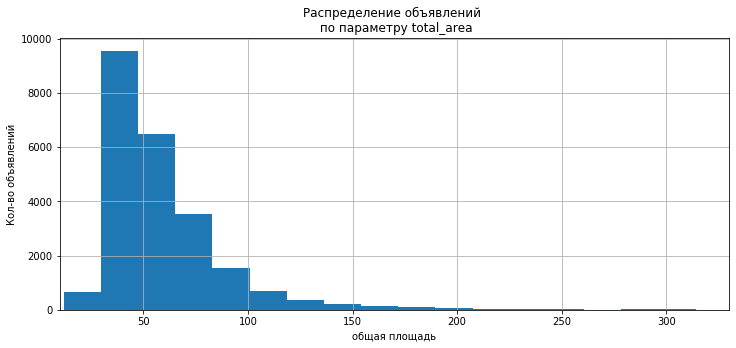

In [9]:
data['total_area'].hist(bins=50,figsize=(12,5))
plt.xlim(10,330)
plt.xlabel('общая площадь')
plt.ylabel('Кол-во объявлений')
plt.title('Распределение объявлений \n по параметру total_area')
plt.show()


По площади мы видим две большие группы: квартиры от 25 до 50 метров, от 50 до 65 метров (примерно), 
средний группы:
от 65 до80 метров
от 80 до 100
и менее 25 метров

Еще есть группа "квартир большой площади" - более 100 метров. 

По площади мы види группы, которые необходимо исследовать более подробно. 
Самые многочисленные - две группы. Однако, у каждой группы могут быть свои особенности, так что я бы исследовала все. 



In [10]:
data['total_area'].describe()


count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

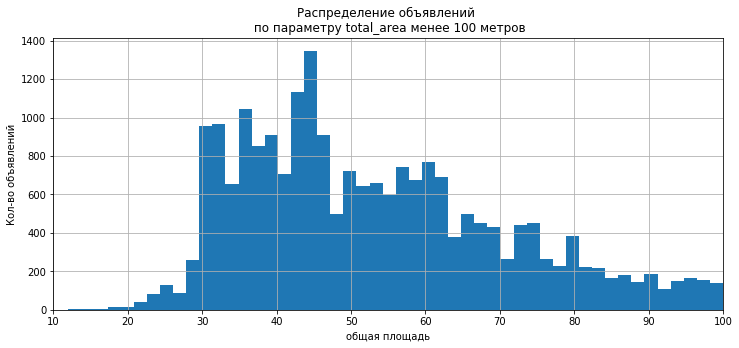

In [11]:
data['total_area'].hist(bins=50,figsize=(12,5), range=(12,100))
plt.xlim(10,100)
plt.xlabel('общая площадь')
plt.ylabel('Кол-во объявлений')
plt.title('Распределение объявлений \n по параметру total_area менее 100 метров')
plt.show()


<div class="alert alert-info">

В обшем, говоря о площади квартир, можно рассматривать выборку 40-69,7 метров как основную выборку, и все квартиру более 100 метров считать выбросами (иначе потеряем 50% данных, если будет всегда брать по процентилям данные) 
Запомним этот вывод.  total_area

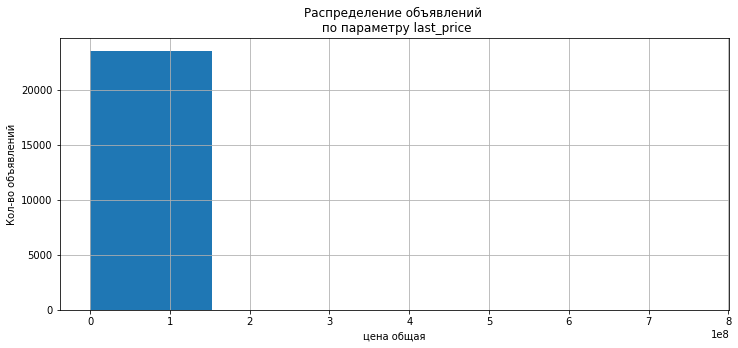

In [12]:
data['last_price'].hist(bins=5,range=(12190, 763000000),figsize=(12,5))

plt.xlabel('цена общая')
plt.ylabel('Кол-во объявлений')
plt.title('Распределение объявлений \n по параметру last_price')
plt.show()


По цене мы видим большой разброс и текущая гистограмма не отображает никаких данных. Попробуем построить "график с усами"
Пока очевидно, что есть большая группа с ценой до 1,5 млн...

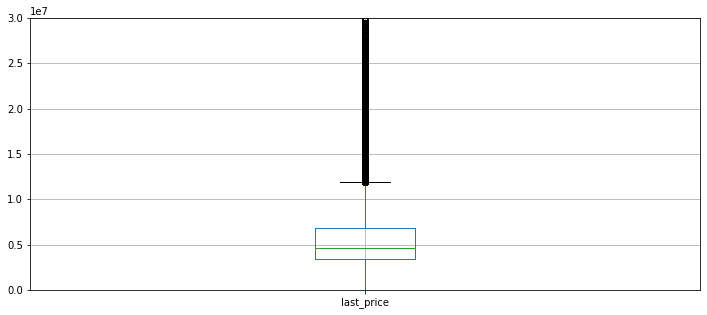

In [13]:
data.boxplot(column='last_price',figsize=(12,5)) 
plt.ylim(0,30000000)
plt.show()

Вывод такой: что по цене крватир есть мощные выбросы, которые необходимо будет убрать из анализа.
Посмотрим еще диаграмму цены за метр, возможно там все более равномерно и гладко?
выбросы начинаются при цене свыше 10 млн рублей за квартиру.
Это вероятно, отдельная категория квартир и недвижимости, сранвивать которую с общей массой смысла нет. Там, вероятно, действует своя логика и свой маркетинг для продажи объектов.



Построим гистограмму для крватир ценой до 10 млн рублей  - это похоже на нормальное распределение. Берем этот ограничение 

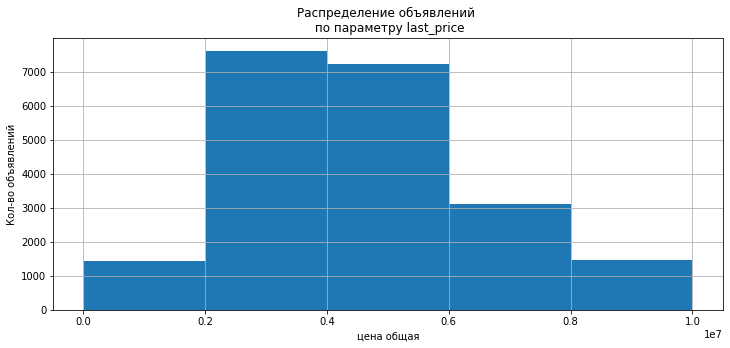

In [14]:

data['last_price'].hist(bins=5,range=(12190, 10000000),figsize=(12,5))

plt.xlabel('цена общая')
plt.ylabel('Кол-во объявлений')
plt.title('Распределение объявлений \n по параметру last_price')
plt.show()



In [15]:
data['last_price'].describe()


count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<div class="alert alert-info">


По цене за недвижижимость наш интервал: до 10  млн руб.
Остальное - выбросы
Это второй критерий по которому будем делать срез!


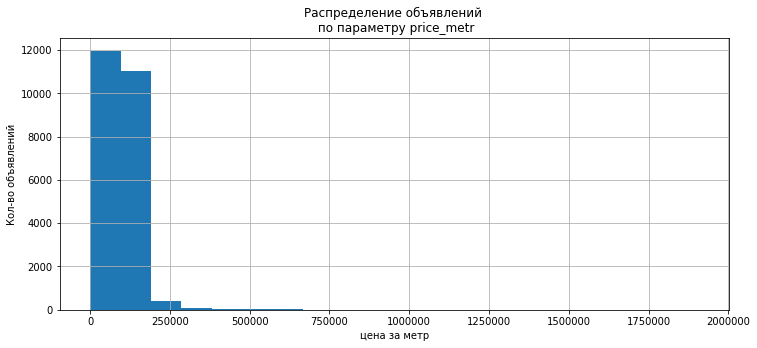

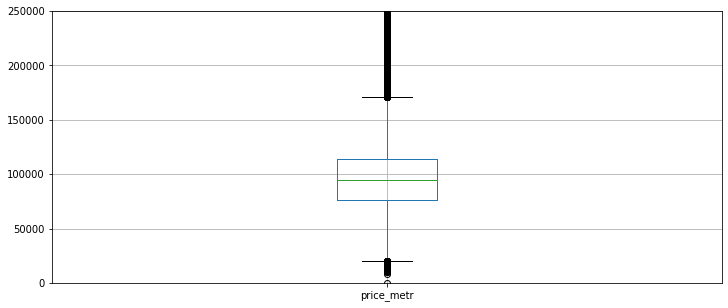

In [16]:
data['price_metr'].hist(bins=20,figsize=(12,5), range=(0,1907500))

plt.xlabel('цена за метр')
plt.ylabel('Кол-во объявлений')
plt.title('Распределение объявлений \n по параметру price_metr')
plt.show()
data['price_metr'].max()

data.boxplot(column='price_metr',figsize=(12,5)) 
plt.ylim(0,250000.0)
plt.show()

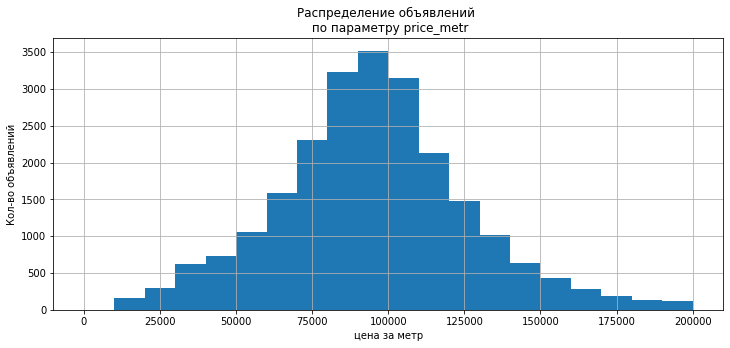

1907500.0

In [17]:
data['price_metr'].hist(bins=20,figsize=(12,5), range=(0,200000))

plt.xlabel('цена за метр')
plt.ylabel('Кол-во объявлений')
plt.title('Распределение объявлений \n по параметру price_metr')
plt.show()
data['price_metr'].max()


<div class="alert alert-info">

По цене за метр тоже видны выбросы, но в целом можно говорить о том, что большинство квартир надохятся в группе "до 200 тыс р за 1 кв метр"
гистограмма по цене до 200 000 р очень похожа на нормальное распределение. Запоминаем эту отсечку





In [18]:
data['price_metr'].describe()


count    2.356500e+04
mean     9.940584e+04
std      5.038943e+04
min      1.118349e+02
25%      7.656613e+04
50%      9.500000e+04
75%      1.142132e+05
max      1.907500e+06
Name: price_metr, dtype: float64

19

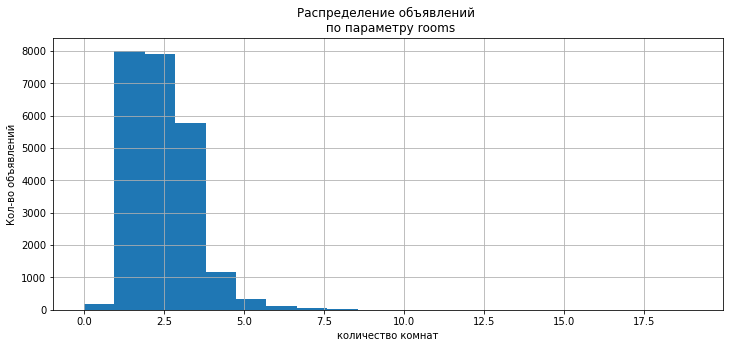

In [19]:
#Далее посмотрим на гистрограммы по числу комнат и высоте потолка

data['rooms'].hist(bins=20,figsize=(12,5), range=(0,19))

plt.xlabel('количество комнат')
plt.ylabel('Кол-во объявлений')
plt.title('Распределение объявлений \n по параметру rooms')

data['rooms'].max()

<div class="alert alert-info">

Вывод: основной массив недвижимости лежит в пределах 1-3 комнаты
есть случаи выбросов с анамально большим и маленьким количеством комнат.
Исключим выбросы более 7 комнат

In [20]:
data['rooms'].describe()


count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

100.0

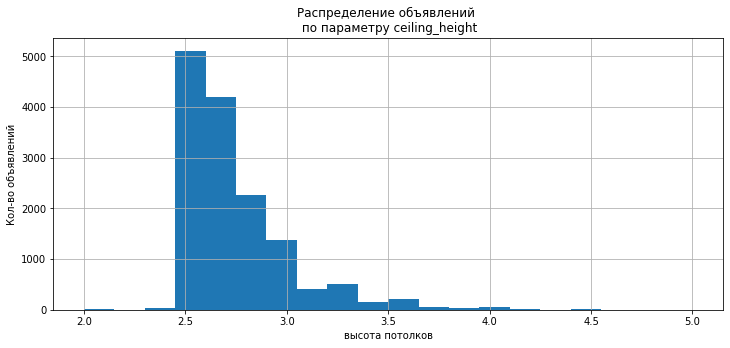

In [21]:
data['ceiling_height'].hist(bins=20,figsize=(12,5), range=(2,5))

plt.xlabel('высота потолков')
plt.ylabel('Кол-во объявлений')
plt.title('Распределение объявлений \n по параметру ceiling_height')

data['ceiling_height'].max()

Видим, что основные высоты укладываются в нормальные значения 2,5-2,7 . Однако есть аномальные значения- типа 100 ;максимум значения) , выше 3,5 метров.  Отсечем все, что выше 3,5 и ниже 2 м

In [22]:
data['ceiling_height'].describe()


count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Время продажи - это столбец days_exposition. Будем считать что это время продажи 

,days_exposition
median,95.000000
mean,180.741395
max,1580.000000
min,1.000000


count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


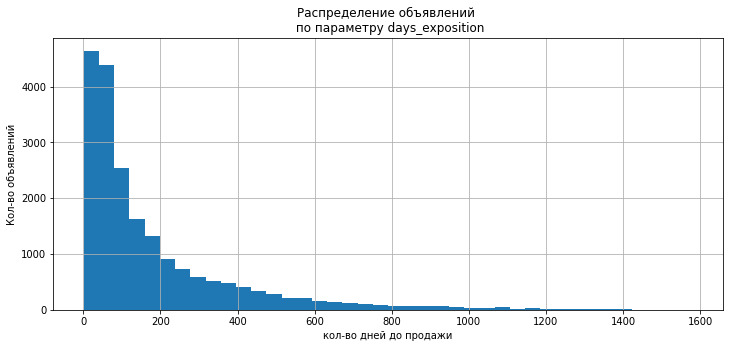

In [23]:
data['days_exposition'].hist(bins=40,figsize=(12,5))

plt.xlabel('кол-во дней до продажи')
plt.ylabel('Кол-во объявлений')
plt.title('Распределение объявлений \n по параметру days_exposition')

display(data.agg({'days_exposition':['median','mean','max','min']}))


print(data['days_exposition'].describe())



<div class="alert alert-info">

Выводы:
Есть аномально длинные сроки продажи - 1618 дней например
В среднем продажи занимают 93 дня 
Дни продажи распределены очень не равномерно (о чем говорит разница между медианой и средним)
посмотрим внимательнее на продажи крватир до 100 дней (самая большая масса объявлений)
все же основная масса квартир продается более 40 дней, в интервале 40-65 дней

В общем, распределение похоже на распределение Пуассона. Поэтому попробуем не ограничивать данные, исключив только нулевые значения 

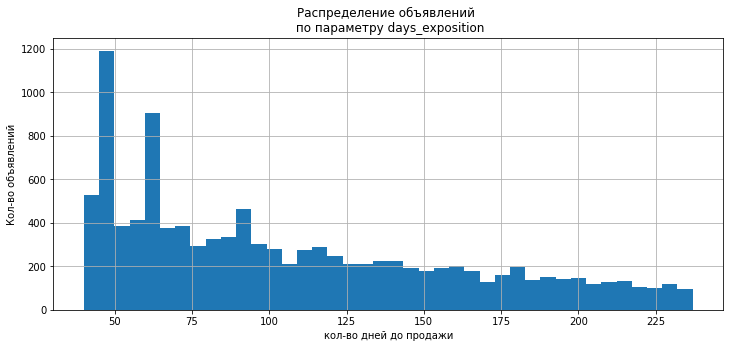

In [24]:
data['days_exposition'].hist(bins=40,figsize=(12,5),range=(40,237))

plt.xlabel('кол-во дней до продажи')
plt.ylabel('Кол-во объявлений')
plt.title('Распределение объявлений \n по параметру days_exposition')
plt.show()

In [25]:
#data['days_exposition'].hist(bins=40,figsize=(12,5), range=(40,237))

<div class="alert alert-info">
Итак, начинаем формировать срез, по которому будет в бальнейшем делать расчеты.
Повторю критерии: 
1. total_area выборка до 100 метров 
2. last_price:  наш интервал: до 10 млн руб.
3. price_metr менее 200 000

5. rooms <7

Начинаем формировать свой срез

In [26]:
data_right=data.query('(total_area<100) and (last_price<10000000) and price_metr<200000  and rooms <7' )
print('Исходный датасет', data.shape[0] )
print('Измененный датасет', data_right.shape[0] )

Исходный датасет 23565
Измененный датасет 20478


После обработки результатов получили 20478строк датасета, что составляет 86% от исходного.
Избавились от аномальных значений. переходим к поиску зависимостей. 

Следующий вопрос исследования
   
Какие факторы больше всего влияют на стоимость квартиры? 
Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. 
Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
Также изучите зависимость от даты размещения: дня недели, месяца и года.


Погнали. Шаг 1 
Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. 
Построим графики и посичтаем корреляцию данных

0.6554542386404905

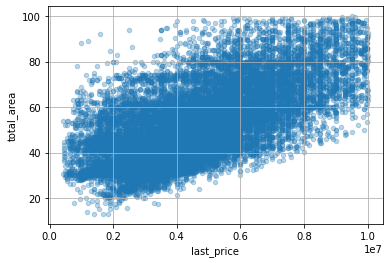

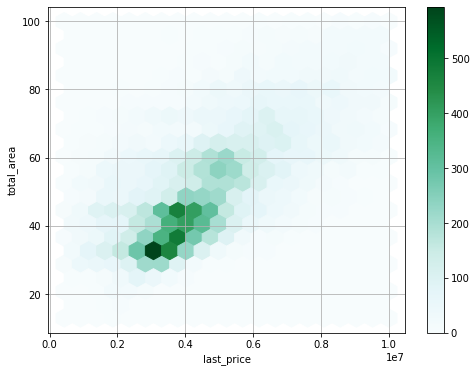

In [27]:
# изучим цену и площадь

data_right.plot(x='last_price', y='total_area', kind='scatter',grid=True, alpha=0.3)

data_right.plot(x='last_price', y='total_area', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 

data_right['last_price'].corr(data_right['total_area'])

<div class="alert alert-info">

Цена и площадь: Коэффициент корреляции 67% говорит достаточно сильной зависимости между площадью квартиры и ценой.


In [28]:
# изучим цену за метр и число комнат

#data_right.plot(x='price_metr', y='rooms', kind='bar')
#x=data_right.sns.barplot(x='price_metr',y='rooms')

#data_right.plot.bar(x='price_metr', y='rooms', rot=0)



#ax = sns.barplot(x="day", y="total_bill", data=tips)

#data_right.plot(x='price_metr', y='rooms', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 

#data_right['price_metr'].corr(data_right['rooms'])

Вывод: зависимости цены от количества комнат не обнаружено
но видны группы разбросов цен для одной двух и трехкомнат

-0.39989004916805904

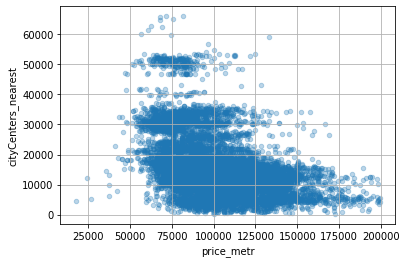

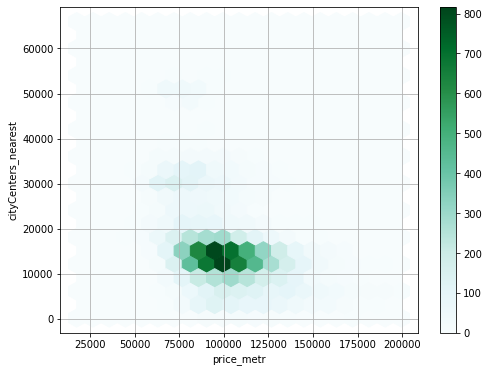

In [29]:
# изучим цену за метр и удаленность от центра.
# как мы помним, в этом паратмере есть пропушенные значения

data_right.plot(x='price_metr', y='cityCenters_nearest', kind='scatter',grid=True, alpha=0.3)

data_right.plot(x='price_metr', y='cityCenters_nearest', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 

data_right['price_metr'].corr(data_right['cityCenters_nearest'])

Вывод: хоть и зависимости как коэффициета корреляции не выявлено, но видна группа квартир одного сегмента:
"расстояние от центра от 1-2 км с ценами за метр примерно 100 тыс р"

Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
что ж, нам необходимы дополнительные срезы по категории квартиры
подготовим срезы по столбцу 'floor_group'

nan

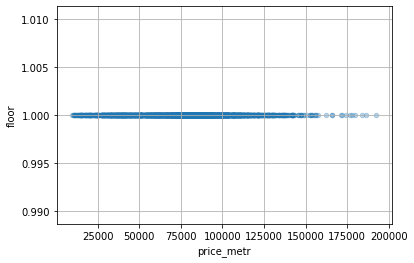

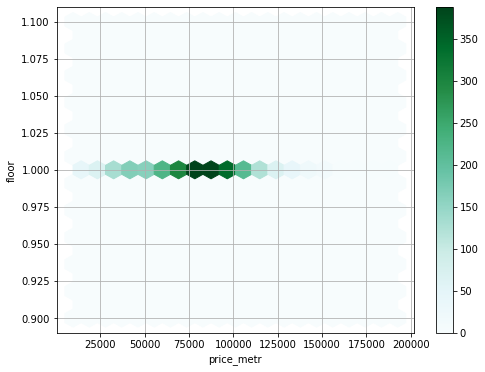

In [30]:
#посмотрим как ведут квартиры на первом этаже
data_first_floor=data_right.query('floor_group=="первый"' )
data_first_floor.plot(x='price_metr',y='floor', kind='scatter',grid=True, alpha=0.3)

data_first_floor.plot(x='price_metr', y='floor', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 

data_first_floor['price_metr'].corr(data_first_floor['floor'])

Вывод:  квартиры на первом этаже стоят по разному

0.2165193291411675

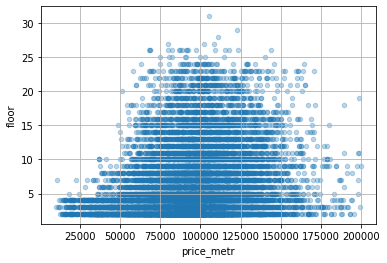

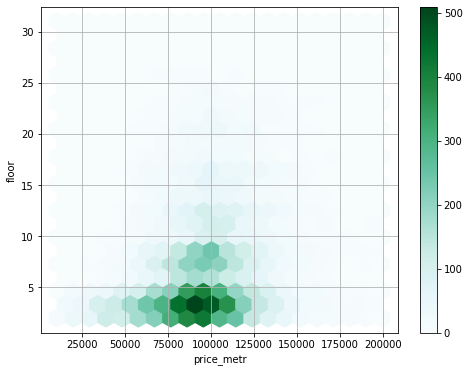

In [31]:
#посмотрим как ведут квартиры на другом этаже
data_other_floor=data_right.query('floor_group=="другой"' )
data_other_floor.plot(x='price_metr', y='floor', kind='scatter',grid=True, alpha=0.3)

data_other_floor.plot(x='price_metr', y='floor', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 

data_other_floor['price_metr'].corr(data_other_floor['floor'])

Вывод: зависимости нет, но есть группа квартир с этажами менее 5. ТАм максимальное оеличество квартир

Посмотрим на графики вообще всех этажей

0.2601052680417706

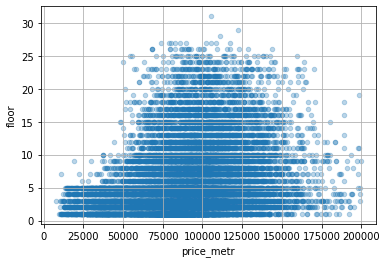

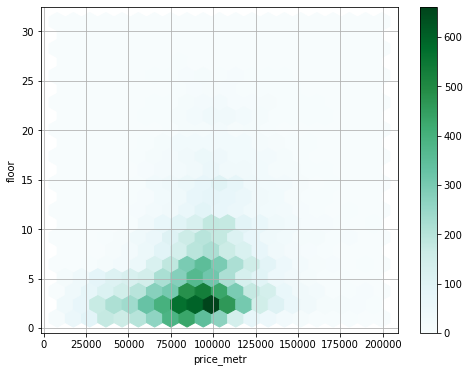

In [32]:
data_right.plot(x='price_metr', y='floor', kind='scatter',grid=True, alpha=0.3)

data_right.plot(x='price_metr', y='floor', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 

data_right['price_metr'].corr(data_right['floor'])

Зависимости цены от этажа квартиры не выявлено.
Выявлена бОльшая группа квартир 1-5 этажей. 

Также изучите зависимость от даты размещения: дня недели, месяца и года.
Проведем аналогичные расчеты для столбцов 
day_exposition	month_exposition	year_exposition
но по параметру "days_exposition"

То есть как зависит длина нахождения в базе объявлений от даты и месяца и года публикации

0.009862696992405566

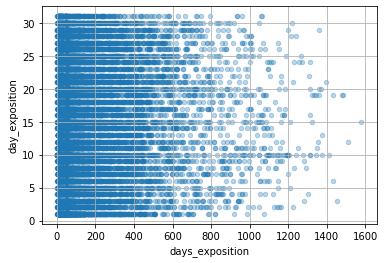

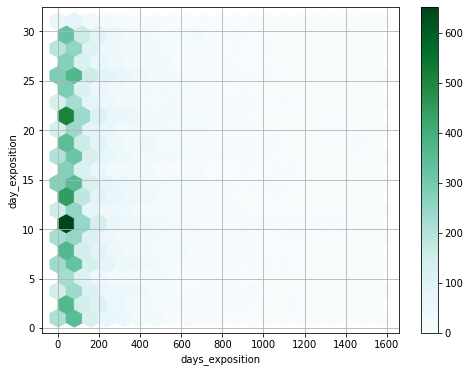

In [33]:
#зависимость от дня (day_exposition)
data_right.plot(x='days_exposition', y='day_exposition', kind='scatter',grid=True, alpha=0.3)

data_right.plot(x='days_exposition', y='day_exposition', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 

data_right['days_exposition'].corr(data_right['day_exposition'])

Вывод: опять никаких зависимостей

-0.039169045217734434

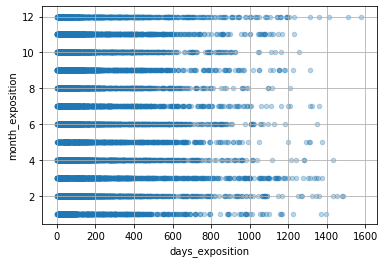

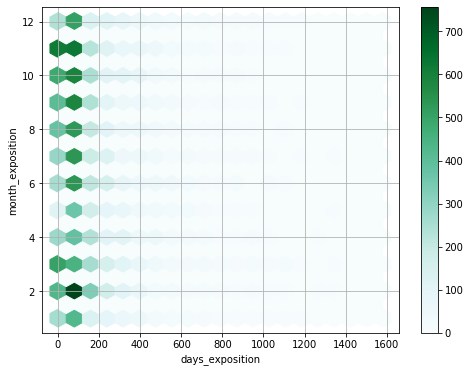

In [34]:
#зависимость от месяца (month_exposition)
data_right.plot(x='days_exposition', y='month_exposition', kind='scatter',grid=True, alpha=0.3)

data_right.plot(x='days_exposition', y='month_exposition', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 

data_right['days_exposition'].corr(data_right['month_exposition'])

Вывод: опять никаких зависимостей

-0.5970549255685242

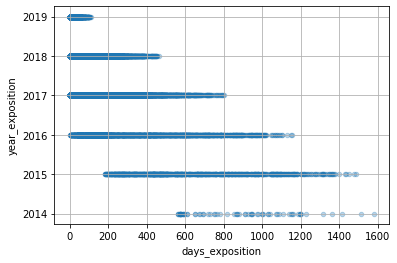

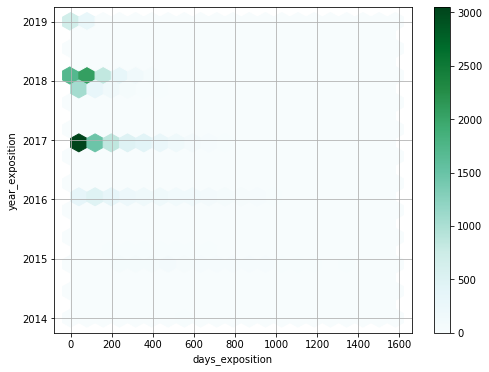

In [35]:
#зависимость от года (year_exposition)
data_right.plot(x='days_exposition', y='year_exposition', kind='scatter',grid=True, alpha=0.3)

data_right.plot(x='days_exposition', y='year_exposition', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 

data_right['days_exposition'].corr(data_right['year_exposition'])

А вот тут интересно:
даже помня и держа в уме пропущенные данные в конце 2019 года , мы видим факт: год к году сокращается время продажи крватир.
Причин может быть много:
начиная от совершенствования технологической базы (сервиса по проадже недвижимости), заканчивая финансово-экономическим состоянием общества.
Но этот вывод мы запомним: квартиры продаются все быстрее. 


Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name’.



In [36]:
table=pd.pivot_table(data_right,
index='locality_name',
values=['total_area', 'last_price'] ,
aggfunc={'total_area': ['count' , sum],
        'last_price':sum}
)

table.columns=['last_price_sum','count_object','sum_total_area']

table['price_metr']=table['last_price_sum']/table['sum_total_area']

top_10=table.sort_values(by='count_object', ascending=False).head(10)

display(top_10)
print('данные по ценам \n', top_10['price_metr'].agg(['min','max']))

,last_price_sum,count_object,sum_total_area,price_metr
locality_name,,,,
Санкт-Петербург,6.810734e+10,12763,663868.52,102591.605109
посёлок Мурино,1.909030e+09,520,22958.04,83152.990412
посёлок Шушары,1.729686e+09,430,22644.46,76384.510781
Всеволожск,1.393696e+09,387,21218.01,65684.579562
Колпино,1.262189e+09,332,17103.24,73798.253781
Пушкин,1.702122e+09,328,17129.03,99370.598569
посёлок Парголово,1.446200e+09,324,16435.00,87995.160268
Гатчина,1.013890e+09,300,14801.38,68499.718270
деревня Кудрово,1.232513e+09,296,13630.55,90422.853076


данные по ценам 
 min     58088.412852
max    102591.605109
Name: price_metr, dtype: float64


Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

Для решения этой задачи сделаем вот что:
сделаем срез по locality_name = Спб
проверим есть ли пустые значения в колонке cityCenters_nearest. Если есть - то исключим их тоже из среза 

In [37]:
data_spb=data_right.query('locality_name=="Санкт-Петербург"')

print(data_spb.isna().count())

total_images               12763
last_price                 12763
total_area                 12763
first_day_exposition       12763
rooms                      12763
ceiling_height             12763
floors_total               12763
living_area                12763
floor                      12763
is_apartment               12763
studio                     12763
open_plan                  12763
kitchen_area               12763
balcony                    12763
locality_name              12763
airports_nearest           12763
cityCenters_nearest        12763
parks_around3000           12763
parks_nearest              12763
ponds_around3000           12763
ponds_nearest              12763
days_exposition            12763
days_exposition_mission    12763
price_metr                 12763
day_exposition             12763
month_exposition           12763
year_exposition            12763
living_area/total_area     12763
kitchen_area/total_area    12763
floor_group                12763
dtype: int

Похоже с рассточниями до центра в Спб все ровно
Создайте столбец с расстоянием до центра в километрах: округлите до целых значений.
у нас вколонке данные указаны в метрах
значит создадим колонку 

cityCenters_nearest_km = cityCenters_nearest/1000. round(0)

In [38]:
data_spb['cityCenters_nearest_km']=data['cityCenters_nearest']/1000
data_spb['cityCenters_nearest_km']=data_spb['cityCenters_nearest_km'].round(0)

data_spb

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,days_exposition_mission,price_metr,day_exposition,month_exposition,year_exposition,living_area/total_area,kitchen_area/total_area,floor_group,cityCenters_nearest_km
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,0,...,558.0,0,92785.714286,20,8,2015,0.612500,0.148214,другой,14.0
7,5,7915000.0,71.6,2019-04-18,2,NaN,24.0,52.7,22,0,...,NaN,1,110544.692737,18,4,2019,0.736034,0.263966,другой,12.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,0,...,289.0,0,88524.590164,26,2,2017,0.714754,0.106557,другой,15.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,0,...,137.0,0,127525.252525,16,11,2017,0.512626,0.214646,другой,14.0
15,16,4650000.0,39.0,2017-11-18,1,NaN,14.0,20.5,5,0,...,19.0,0,119230.769231,18,11,2017,0.525641,0.194872,другой,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23686,8,3300000.0,31.0,2017-04-29,1,2.55,9.0,18.0,6,0,...,193.0,0,106451.612903,29,4,2017,0.580645,0.209677,другой,12.0
23687,6,3200000.0,39.0,2017-12-16,1,NaN,9.0,20.0,6,0,...,38.0,0,82051.282051,16,12,2017,0.512821,0.282051,другой,17.0
23689,13,3550000.0,35.3,2018-02-28,1,2.86,15.0,16.3,4,0,...,29.0,0,100566.572238,28,2,2018,0.461756,0.257790,другой,16.0
23690,3,5500000.0,52.0,2018-07-19,2,NaN,5.0,31.0,2,0,...,15.0,0,105769.230769,19,7,2018,0.596154,0.115385,другой,6.0


После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

Похоже что нам нужно сводная таблица
где будет группировка по cityCenters_nearest_km - и расчет средней цены (то есть last_price/ количество объектов для данного размера км)


In [39]:
data_km=data_spb.pivot_table(
index='cityCenters_nearest_km',
values=['last_price','total_area'],
aggfunc={'last_price':['count','sum'],
         'total_area': sum})

data_km.columns=['count_objects', 'sum_price', 'total_area_sum']

data_km['price_per_km']=data_km['sum_price']/data_km['total_area_sum']

data_km



,count_objects,sum_price,total_area_sum,price_per_km
cityCenters_nearest_km,,,,
0.0,5,3.240000e+07,282.20,114812.189936
1.0,75,5.653330e+08,5043.38,112094.071634
2.0,135,9.816880e+08,8923.65,110009.693343
3.0,200,1.331104e+09,12690.74,104887.807961
4.0,355,2.437330e+09,22151.02,110032.399411
5.0,455,3.119733e+09,27233.60,114554.574019
6.0,352,2.318143e+09,19992.76,115949.106477
7.0,261,1.622817e+09,14544.34,111577.212854
8.0,409,2.476208e+09,22126.34,111912.232525


Text(0.5, 1.0, 'График зависимости цены \n от удаленности от центра')

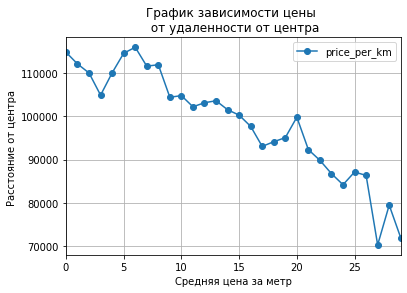

In [40]:
data_km.plot(y='price_per_km', style='o-', grid=True, xlim=(0,29))

plt.xlabel('Средняя цена за метр')
plt.ylabel('Расстояние от центра ')
plt.title('График зависимости цены \n от удаленности от центра')


Вывод: достаточо странное и не типичное снижение цены для квартир на 3 км отцентра. Но тем не менее. после 6 км мы видим плавное снижение цены (с выбросами в какие-то элитные поселки)

Итого - центр это радиус 6 км


Приступаем к последней задаче:
Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

Делаем центральный срез 
и смотрим средние и медианные значения по площадь, цена, число комнат, высота потолков.
анализируем корреляцию между last_price и число комнат, этаж, удалённость от центра, дата размещения объявления

In [41]:
data_centr=data_spb.query('cityCenters_nearest_km <=6')

print('Данные для всей выборки')
display(data_right.agg({'total_area':['median','mean','max','min'],'last_price':['median','mean','max','min'],'rooms':['median','mean','max','min'],'ceiling_height':['median','mean','max','min']}))


print('Данные для центра СпБ')
data_centr.agg({'total_area':['median','mean','max','min'],'last_price':['median','mean','max','min'],'rooms':['median','mean','max','min'],'ceiling_height':['median','mean','max','min']})

#data_centr.agg({'total_area':['median','mean'],'last_price':['median','mean'],'rooms':['median','mean'],'ceiling_height':['median','mean']})

Данные для всей выборки


,total_area,last_price,rooms,ceiling_height
median,48.000000,4.300000e+06,2.000000,2.600000
mean,51.134779,4.579459e+06,1.871716,2.717699
max,99.900000,9.999999e+06,6.000000,32.000000
min,13.000000,4.300000e+05,0.000000,1.000000


Данные для центра СпБ


,total_area,last_price,rooms,ceiling_height
median,60.000000,6.860000e+06,2.000000,3.000000
mean,61.076316,6.839398e+06,2.171211,3.080657
max,99.500000,9.999000e+06,5.000000,32.000000
min,13.000000,1.600000e+06,0.000000,2.400000


Вывод по параметрам или отличиче недвижимости центра Спб от всей выборки

В среднем, общая площадь в центре больше, чем за пределами центра СПБ:
центр среднее значение - 61 м, прочие районы 51 м - то есть разница на 10 м
Цена на недвижимость в центре выше, чем в среднем по выборке - 6,8 млн против 4, 5 млн (то есть разница в 50%)
Число комнат в среднем одинаковое - примерно 2. но вцентре площадь комнат больше, чем на окраинах
и высота потолков в центре города больше

Изучим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?


-0.5744843319778886

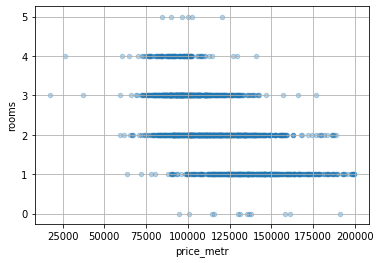

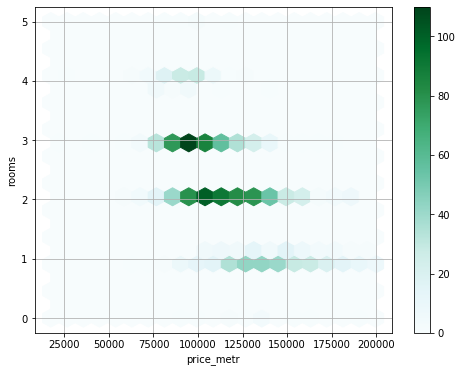

In [42]:
# изучим цену за метр и число комнат

data_centr.plot(x='price_metr', y='rooms', kind='scatter',grid=True, alpha=0.3)

data_centr.plot(x='price_metr', y='rooms', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 

data_centr['rooms'].corr(data_centr['price_metr'])

<div class="alert alert-info">

Вывод: есть отрицательная зависимость для квартир  в центре: чем больше комнат, тем дешевле квадратный метр!

0.6752178349703161

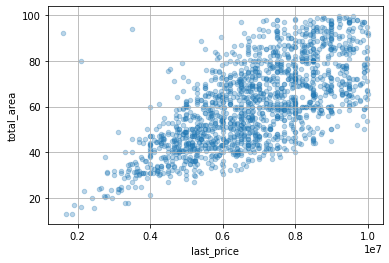

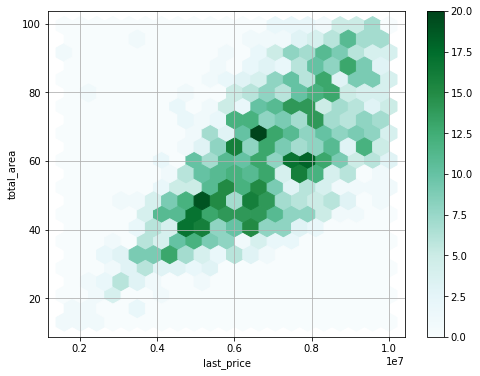

In [43]:
# изучим цену  и площадь

data_centr.plot(x='last_price', y='total_area', kind='scatter',grid=True, alpha=0.3)

data_centr.plot(x='last_price', y='total_area', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 

data_centr['last_price'].corr(data_centr['total_area'])

<div class="alert alert-info">

Вывод: для квартир в центре зависимость цены отплощади имеет еще более сильную корреляцию, чем для всей выборки!

0.1080621234604016

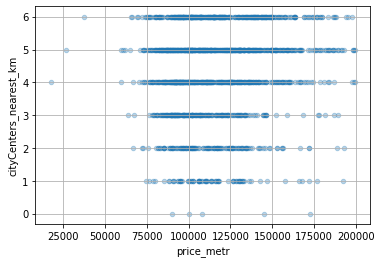

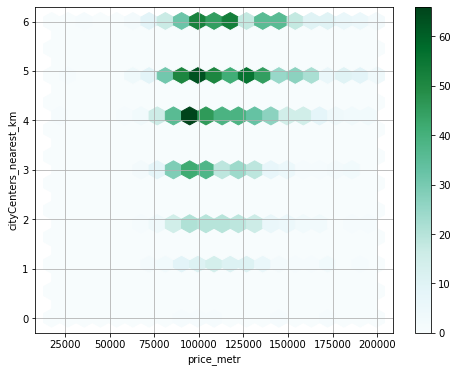

In [44]:
# изучим цену  и удаленность от цетра

data_centr.plot(x='price_metr', y='cityCenters_nearest_km', kind='scatter',grid=True, alpha=0.3)

data_centr.plot(x='price_metr', y='cityCenters_nearest_km', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 

data_centr['price_metr'].corr(data_centr['cityCenters_nearest_km'])

<div class="alert alert-info">

Вывод: зависимости цены за метр от дальности от цетнра в рамках центра не выявлено

0.26292522511197725

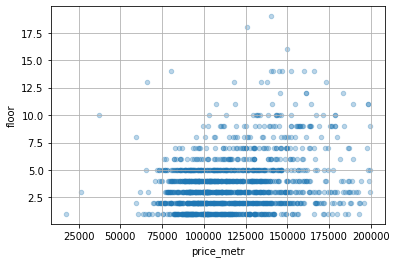

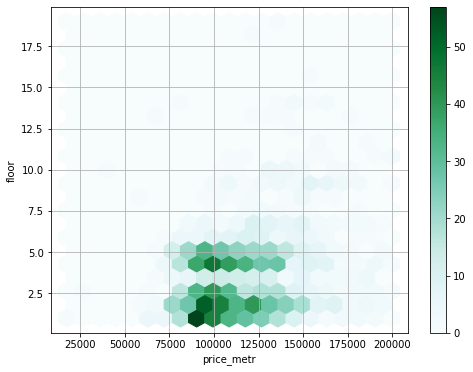

In [45]:
# изучим цену  и этаж

data_centr.plot(x='price_metr', y='floor', kind='scatter',grid=True, alpha=0.3)

data_centr.plot(x='price_metr', y='floor', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 

data_centr['price_metr'].corr(data_centr['floor'])

<div class="alert alert-info">

Вывод: зависимости очевидной между ценой и этажом не выявлено, однако можно заметить большее количество объектов на нижних этажах (1-3), чем в общей выборке. 

0.05309356487320191

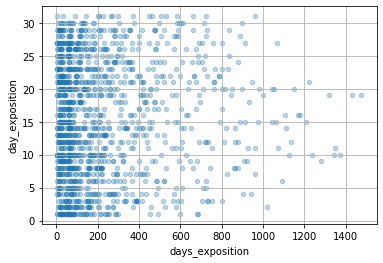

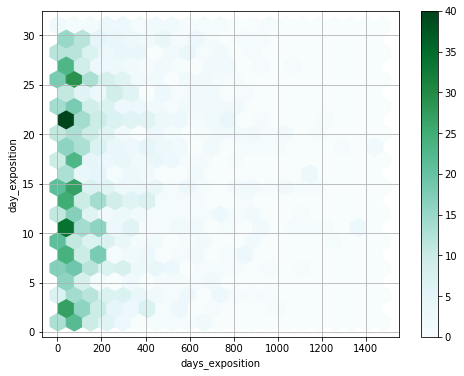

In [46]:
#зависимость от дня (day_exposition)
data_centr.plot(x='days_exposition', y='day_exposition', kind='scatter',grid=True, alpha=0.3)

data_centr.plot(x='days_exposition', y='day_exposition', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 

data_centr['days_exposition'].corr(data_centr['day_exposition'])

Вывод: опять не вижу никакой зависимости от дня публикации объявлений о продаже

-0.06715203355886482

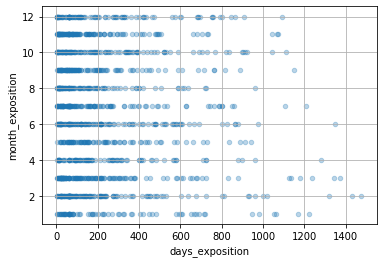

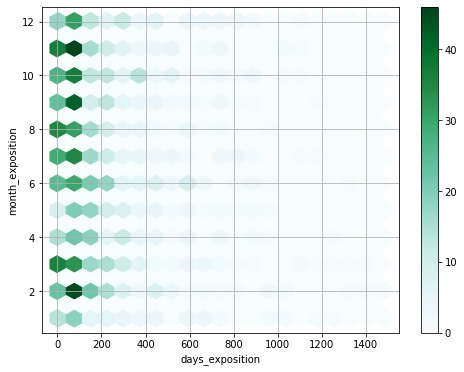

In [47]:
#зависимость от месяца (month_exposition)
data_centr.plot(x='days_exposition', y='month_exposition', kind='scatter',grid=True, alpha=0.3)

data_centr.plot(x='days_exposition', y='month_exposition', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 
data_centr['days_exposition'].corr(data_centr['month_exposition'])

Вывод: опять не вижу никакой зависимости от месяца публикации объявлений о продаже

-0.6348914453155107

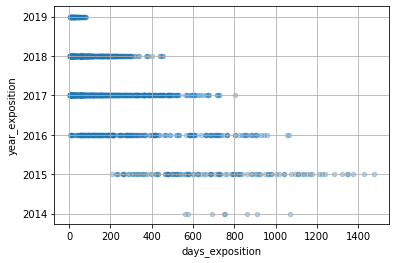

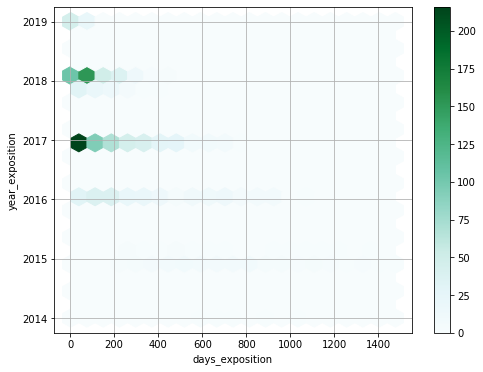

In [48]:
#зависимость от года (year_exposition)
data_centr.plot(x='days_exposition', y='year_exposition', kind='scatter',grid=True, alpha=0.3)

data_centr.plot(x='days_exposition', y='year_exposition', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 

data_centr['days_exposition'].corr(data_centr['year_exposition'])

Вывод: есть корреляция: с каждом годом объекты недвижимости в центре покупают все быстрее

## Общий вывод

Структура и полнота данных
В анализируемых данных были обнаружены странности следующего рода:
ceiling_height - есть пропущенные значения по высоте потолков. Пропущена высота потолков почти в половине значений, что является критичным к объему выборки. Высота потолка может влиять на цену при значимом отклонении от обычных данных. Принято решение о замене пропусков модой.

days_exposition - 14% данных не заполнена информация о том, как долго продавалась квартира. Очень важная метрика. Возможно квартира так и не была продана, можно заполнить данные как разницу между самым "большим днем" из датасета и "дату публикации» . Рокомендация ввести в базу данных дон параметр типа булево значение: 1 - объект продан, о - объект не продан. Так какобъекты могут быть сняты из базы по каким-то другим причинам, кроме продажи.
Встречаются незаполненные и пропущенные значения в столбцах: floors_total , living_area , kitchen_area, locality_name, airports_nearest, parks_nearest, ponds_around3000, ponds_nearest.Однако в рамках задачи пропуски там не похожи на значимые. Но, необходимо обратить внимание разработчиков на подобные случаи.

Формирование критериев для поиска зависисмостей и корреляций
В результате детального изучения данных были выявлены следующие параметры для формирования анализируемой выборки :

площадь квартир: квартиры до 100 метров общей площади
По цене квартир существуют мощные выбросы в бОльшую сторону (что говорит о разных хклассах жилья) Для целей исследования были предложены все объекты стоимостью до 10 млн рублей и ценой за кв метр до 200 тыс р

Количество комнат: выбраны комнаты менее 7 штук
Высота потолков: Видим, что основные высоты укладываются в нормальные значения 2,5-2,7 . Однако есть аномальные значения- типа 100 м Отсечем все, что выше 3,5 и ниже 2 м

Относительно сроков продажи квартир:  Есть аномально длинные сроки продажи - 1618 дней например В среднем продажи занимают 93 дня Дни продажи распределены очень не равномерно (о чем говорит разница между медианой и средним) В общем, распределение похоже на распределение Пуассона. Поэтому попробуем не ограничивать данные, исключив только нулевые значения


Выводы о наличии зависимостей по общей выборки:
Цена и площадь: коэффициетн корреляции 65%- прямая зависимость! 
Цена за метр и количество комнат - нет зависимости
Цена за метр и удаленность от центра: хоть и зависимости как коэффициета корреляции не выявлено, но видна группа квартир одного сегмента:
"расстояние от центра от 1-2 км с ценами за метр примерно 100 тыс р»
Зависимость цены от этажа размещения объекта: зависимости нет, но есть группа квартир с этажами менее 5. Там максимальное количество квартир
зависимость от даты размещения: дня недели, месяца и года. : год к году сокращается время продажи крватир. Причин может быть много: начиная от совершенствования технологической базы (сервиса по проадже недвижимости), заканчивая финансово-экономическим состоянием общества. Но этот вывод мы запомним: квартиры продаются все быстрее.

Оценка 10 топ-населенных пунктов (отбор по количеству объявлений)
половина объектов недвижимости находится в Санкт-Петербурге Максимальная цена на недвижимость в Спб  (102 тыс р за метр) Минимальная цена в г Выборг (58 тыс р)


Определим и проанализируем центральную часть г СпБ (определено, что центр - это радиус 6 км от нулевого км)

Вывод по параметрам или отличиче недвижимости центра Спб от всей выборки
В среднем, общая площадь в центре больше, чем за пределами центра СПБ: центр среднее значение - 61 м, прочие районы 51 м - то есть разница на 10 м Цена на недвижимость в центре выше, чем в среднем по выборке - 6,8 млн против 4, 5 млн (то есть разница в 50%) Число комнат в среднем одинаковое - примерно 2. но вцентре площадь комнат больше, чем на окраинах и высота потолков в центре города больше
Наличие или отсутствие зависимостей по параметрам в центре Спб:
Цена и площадь: для квартир в центре зависимость цены от площади имеет еще более сильную корреляцию, чем для всей выборки! 67%!!!
Цена за метр и количество комнат - есть отрицательная зависимость для квартир  в центре: чем больше комнат, тем дешевле квадратный метр!
Цена за метр и удаленность от центра:   зависимости цены за метр от дальности от цетнра в рамках центра не выявлено
 зависимости очевидной между ценой и этажом не выявлено, однако можно заметить большее количество объектов на нижних этажах (1-3), чем в общей выборке.
Относительно даты месяца и года публикации - все совпадает с общей выборкой